In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import generic libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import seaborn as sns
import scipy.io
import os, sys
import tqdm
# from scipy.optimize import curve_fit
# from pathlib import Path
# import pickle

In [3]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

In [4]:
# Import local OASIS installation
sys.path.append(os.path.expanduser('~/projects/2017-kohl/OASIS'))
from oasis.functions import deconvolve
from oasis import oasisAR1, oasisAR2

/home/zenke/projects/2017-kohl/OASIS/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [5]:
# Import local tools
sys.path.append(os.path.expanduser('~/projects/2017-kohl/repo/'))
from pynalysis import utils

In [6]:
import hickle
f = open('/home/zenke/data/kohl/videos/CTBD1.3g/CTBD13g-area02-20180805-30a-30p_0001.hkl', 'r')
buf = hickle.load(f)

In [7]:
fps=30

In [8]:
from sklearn.decomposition import PCA, IncrementalPCA, FastICA, NMF

In [9]:
# from sklearn.manifold import TSNE
# from sklearn.cluster import DBSCAN

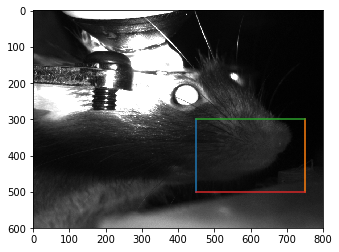

In [10]:
plt.imshow(buf.reshape((-1,600,800))[1375], cmap=plt.cm.gray)
plt.plot([450,450],[300,500])
plt.plot([750,750],[300,500])
plt.plot([450,750],[300,300])
plt.plot([450,750],[500,500])

In [11]:
cut = buf[:,300:500,450:750]
osh = cut.shape
X = cut.reshape((cut.shape[0],-1))
# X = buf.reshape((buf.shape[0],-1))

In [12]:
X = np.array(X, dtype=np.float32)

In [13]:
X = (X-X.min(0))/(X.max(0)-X.min(0)+1e-7)

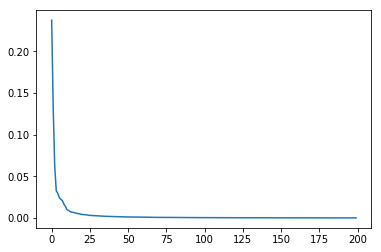

In [14]:
pca = PCA(n_components=200)
Xred = pca.fit_transform(X)
plt.plot(pca.explained_variance_ratio_)

In [15]:
# ica = FastICA(n_components=200)
# ica.fit(X[:10000])
# Xred = ica.transform(X)

In [16]:
# nmf = NMF(n_components=200)
# Xnmf = nmf.fit_transform(X)

In [17]:
store = (pca.components_,Xred)

In [18]:
f = open('/home/zenke/data/kohl/videos/CTBD1.3g/CTBD13g-area02-20180805-30a-30p_0001_pca.hkl', 'w')
hickle.dump(store, f)